In [181]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# 와인 데이터 로드

In [182]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data,columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# min - max 스케일러 생성

In [183]:
scaler = MinMaxScaler()

# 스케일링 적용

In [184]:
wine_df_scaled = pd.DataFrame(scaler.fit_transform(wine_df),columns=wine['feature_names'])

# 스케일링된 데이터 확인

In [185]:
wine_df_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [186]:
X = wine_df_scaled
y = wine.target

In [187]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [188]:
len(y_train), len(y_test)

(124, 54)

In [189]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([39, 53, 32]))

In [190]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2]), array([20, 18, 16]))

In [191]:
tree = DecisionTreeClassifier(random_state=12)

In [192]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=12)

In [193]:
tree.score(X_train,y_train)

1.0

In [194]:
tree.score(X_test,y_test)

0.9444444444444444

In [195]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.39797943, 0.        , 0.        , 0.45516105,
       0.        , 0.        , 0.14685952])

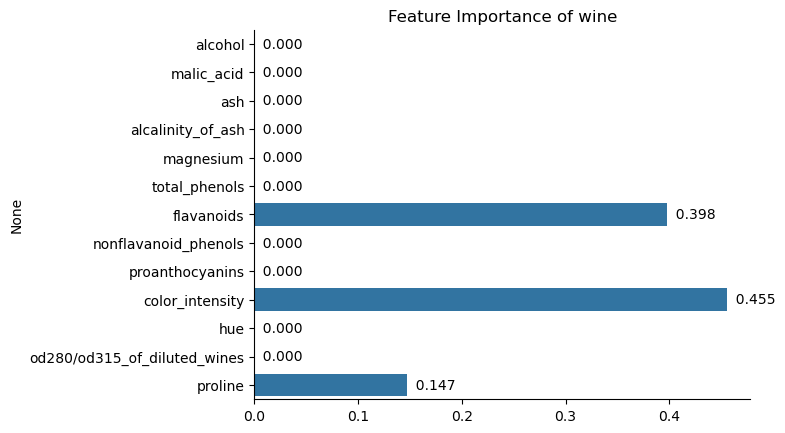

In [196]:
ax = sns.barplot(
    x=tree.feature_importances_,y=wine_df.columns)

ax.bar_label(ax.containers[0],fmt='  %.3f')
plt.gca().spines[['right','top']].set_visible(False)
plt.title("Feature Importance of wine")
plt.show()

In [197]:
scores = cross_val_score(tree,X,y,cv=5)
scores

array([0.91666667, 0.77777778, 0.94444444, 0.91428571, 0.85714286])

# RidgeClassifier

In [198]:
ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train,y_train)

RidgeClassifier()

In [199]:
y_pred_ridge = ridge_clf.predict(X_test)
y_pred_ridge

array([2, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 2, 1, 0, 1, 2, 1, 2, 2, 2])

In [200]:
accuracy_ridge = accuracy_score(y_test,y_pred_ridge)
accuracy_ridge

0.9814814814814815

In [201]:
# 주요 두 개의 피처 선택
y_feature

160    0.543515
156    0.659556
78     0.180887
45     0.337884
112    0.215017
168    0.629693
7      0.321672
153    0.788396
103    0.066553
150    0.624573
137    0.317406
161    0.392491
124    0.129693
83     0.300341
149    0.692833
23     0.226109
1      0.264505
5      0.466724
21     0.274744
152    0.496587
11     0.317406
14     0.530717
93     0.074232
64     0.142491
47     0.411263
12     0.368601
77     0.116894
92     0.151024
62     0.215017
40     0.413823
8      0.334471
63     0.270478
42     0.354096
166    0.802048
15     0.513652
173    0.547782
81     0.223549
6      0.338737
61     0.381399
126    0.226962
41     0.255973
39     0.325939
85     0.114334
17     0.453925
16     0.419795
147    0.543515
113    0.153584
55     0.424061
129    0.112628
172    0.718430
66     0.343003
159    0.893345
167    0.766212
138    0.377133
Name: color_intensity, dtype: float64

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeClassifier was fitted with feature names
  warnings.warn(


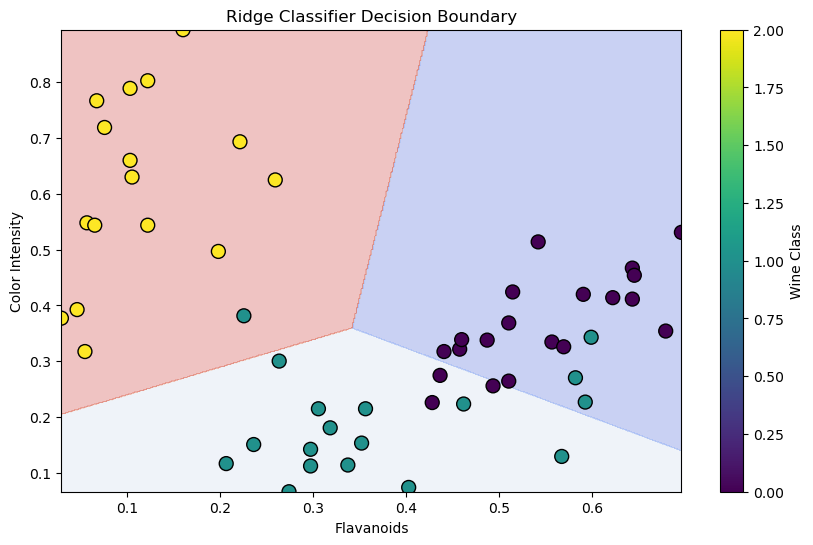

In [202]:
# 주요 두 개의 피처 선택 (flavanoids와 color_intensity)
X_train_subset = X_train[['flavanoids', 'color_intensity']]
X_test_subset = X_test[['flavanoids', 'color_intensity']]

# 모델 훈련
ridge_clf.fit(X_train_subset, y_train)

# 예측을 위한 meshgrid 생성
xx, yy = np.meshgrid(np.linspace(X_test_subset['flavanoids'].min(), X_test_subset['flavanoids'].max(), 500),
                     np.linspace(X_test_subset['color_intensity'].min(), X_test_subset['color_intensity'].max(), 500))

# 피처를 결합하여 예측 수행
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = ridge_clf.predict(grid_points)
Z = Z.reshape(xx.shape)

# 시각화
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_subset['flavanoids'], X_test_subset['color_intensity'], c=y_test, edgecolor='k', s=100, cmap='viridis')
plt.title('Ridge Classifier Decision Boundary')
plt.xlabel('Flavanoids')
plt.ylabel('Color Intensity')
plt.colorbar(label='Wine Class')
plt.show()